In [24]:
from sklearn.cluster import KMeans
import pandas as pd
import glob
from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
# Look pretty...
matplotlib.style.use('ggplot')
%matplotlib notebook

In [2]:

def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  exit()




#
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!


#
# TODO: Load up the dataset and take a peek at its head
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
df = pd.read_csv('Datasets/CDR.csv')

print(df['Direction'].unique())
print(df['DOW'].unique())
df.head()

['Incoming' 'Missed']
['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thr' 'Fri']


,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
0,4638472273,2666307251,Incoming,2010-12-25,07:16:24.736813,Sat,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
1,4638472273,1755442610,Incoming,2010-12-25,21:18:30.053710,Sat,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf,32.731722,-96.709500
2,4638472273,5481755331,Incoming,2010-12-25,14:52:42.878016,Sat,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
3,4638472273,1755442610,Incoming,2010-12-25,16:02:09.001913,Sat,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00,32.899944,-96.910389
4,4638472273,2145623768,Incoming,2010-12-25,15:28:35.028554,Sat,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807,32.899944,-96.910389


In [3]:
df.dtypes

In             int64
Out            int64
Direction     object
CallDate      object
CallTime      object
DOW           object
Duration      object
TowerID       object
TowerLat     float64
TowerLon     float64
dtype: object

In [4]:
df.ix[:,'CallDate'] = pd.to_datetime(df.ix[:,'CallDate'] , errors='coerce')
df.ix[:,'CallTime'] = pd.to_timedelta(df.ix[:,'CallTime'] , errors='coerce')
df.ix[:,'Duration'] = pd.to_timedelta(df.ix[:,'Duration'] , errors='coerce')

In [5]:
print(df.dtypes)

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration     timedelta64[ns]
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object


In [6]:
#
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
#
# .. your code here ..
unique_phone_list = df['In'].unique().tolist()
print(unique_phone_list)

[4638472273, 1559410755, 4931532174, 2419930464, 1884182865, 3688089071, 4555003213, 2068627935, 2894365987, 8549533077]


In [7]:
df_user1 = df[df['In']== unique_phone_list[0]]

<IPython.core.display.Javascript object>


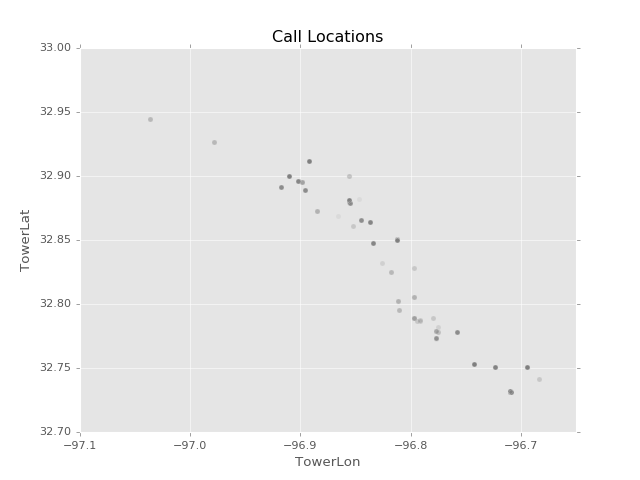

In [8]:
# 
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above
#
# .. your code here ..
df_user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')

In [9]:

#
# INFO: The locations map above should be too "busy" to really wrap your head around. This
# is where domain expertise comes into play. Your intuition tells you that people are likely
# to behave differently on weekends:
#
# On Weekdays:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday



#
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're
# only examining records that came in on weekends (sat/sun).
#
# .. your code here ..
df_user1_weekend = df_user1[(df_user1['DOW'] == 'Sat') |( df_user1['DOW']== 'Sun')]

In [10]:
df_user1_weekend.dtypes


In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration     timedelta64[ns]
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

In [11]:
#
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00).
# You can use < and > to compare the string times, just make sure you code them as military time
# strings, eg: "06:00:00", "22:00:00": https://en.wikipedia.org/wiki/24-hour_clock
#
# You might also want to review the Data Manipulation section for this. Once you have your filtered
# slice, print out its length:
#
#df_user1_weekend_bf_6_af_10 = df_user1_weekend[(df['CallTime'] <= '06:00:00') | (df_user1_weekend >= '22:00:00')]
df_user1_weekend_bf_6_af_10 = df_user1_weekend[(df_user1_weekend['CallTime'] <= '06:00:00')|
                                   (df_user1_weekend['CallTime'] >= '22:00:00')]

In [18]:
df_user1_weekend_bf_6_af_10.head()

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,22:22:33.693878,Sat,00:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,22:21:27.466908,Sat,00:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,22:59:23.206408,Sat,00:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,05:15:40.205917,Sun,00:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,05:08:20.121145,Sat,00:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417


<IPython.core.display.Javascript object>


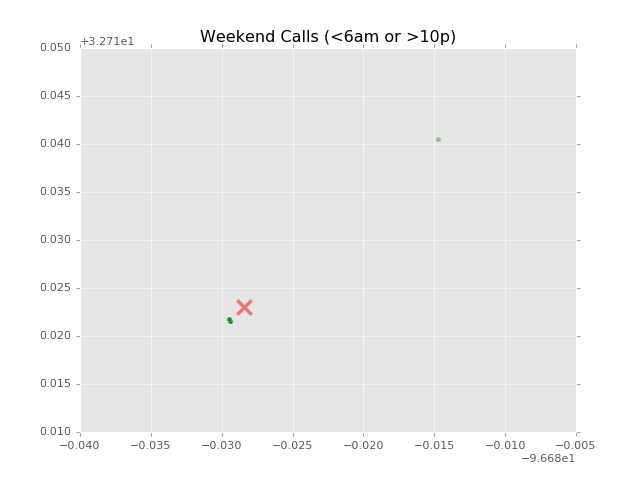

[[-96.70839404  32.73299989]]


In [23]:
#
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar
# with maps, you know well that your X-Coordinate should be Longitude, and your Y coordinate
# should be the tower Latitude. Check the dataset headers for proper column feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell
# phone tower position data; but considering the below are for Calls that arrived in the twilight
# hours of weekends, it's likely that wherever they are bunched up is probably near where the
# caller's residence:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_user1_weekend_bf_6_af_10.TowerLon,df_user1_weekend_bf_6_af_10.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you
# notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
# apart from one another), then increase K=2, with the goal being that one of the centroids will
# sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
# data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
# no feature scaling is required. Print out the centroid locations and add them onto your scatter
# plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
# .. your code here ..
df_k_means = df_user1_weekend_bf_6_af_10[['TowerLon','TowerLat']]

kmeans = KMeans(n_clusters=1)
kmeans.fit(df_k_means)  
labels = kmeans.predict(df_k_means)
centroids = kmeans.cluster_centers_
#
# INFO: Print and plot the centroids...
ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
print(centroids)
plt.show()  

In [27]:
#Assignment 3
def clusterInfo(model):
  print ("Cluster Analysis Inertia: ", model.inertia_)
  print ('------------------------------------------')
  for i in range(len(model.cluster_centers_)):
    print ("\n  Cluster ", i)
    print ("    Centroid ", model.cluster_centers_[i])
    print ("    #Samples ", (model.labels_==i).sum()) # NumPy Power;

In [25]:
# Find the cluster with the least # attached nodes
def clusterWithFewestSamples(model):
  # Ensure there's at least on cluster...
  minSamples = len(model.labels_)
  minCluster = 0
  for i in range(len(model.cluster_centers_)):
    if minSamples > (model.labels_==i).sum():
      minCluster = i
      minSamples = (model.labels_==i).sum()
  print ("\n  Cluster With Fewest Samples: ", minCluster)
  return (model.labels_==minCluster)


 test 
 test1


In [33]:
def doKMeans(data, clusters=0):
  #
  # TODO: Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
  # data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
  # no feature scaling is required. Print out the centroid locations and add them onto your scatter
  # plot. Use a distinguishable marker and color.
  data = data[['TowerLat','TowerLon']]
  #
  # Hint: Make sure you fit ONLY the coordinates, and in the CORRECT order (lat first).
  # This is part of your domain expertise.
  #
  # .. your code here ..
  
  kmeans = KMeans(n_clusters=1)
  model=kmeans.fit(data)  
  labels = kmeans.predict(data)
  centroids = kmeans.cluster_centers_
  #
  # INFO: Print and plot the centroids...
  #ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
  print(centroids) 
  #plt.show() 
  return model

['Incoming' 'Missed']
['Sat' 'Sun' 'Mon' 'Tue' 'Wed' 'Thr' 'Fri']


Examining person:  0


<IPython.core.display.Javascript object>


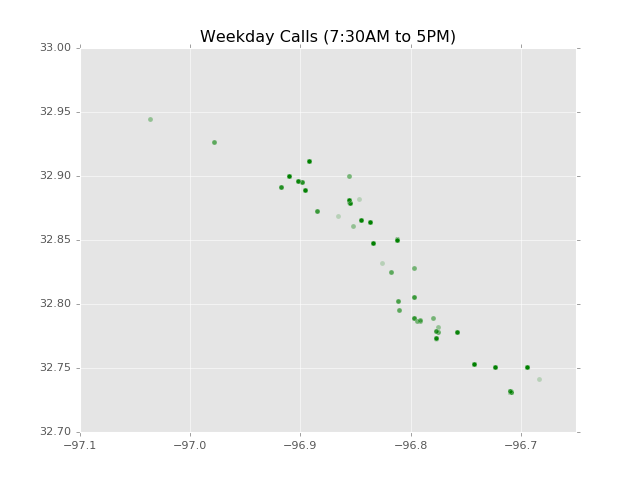

In [32]:
#
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!


#
# TODO: Load up the dataset and take a peek at its head
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
df = pd.read_csv('Datasets/CDR.csv')

print(df['Direction'].unique())
print(df['DOW'].unique())
df.ix[:,'CallDate'] = pd.to_datetime(df.ix[:,'CallDate'] , errors='coerce')
df.ix[:,'CallTime'] = pd.to_timedelta(df.ix[:,'CallTime'] , errors='coerce')
df.ix[:,'Duration'] = pd.to_timedelta(df.ix[:,'Duration'] , errors='coerce')
#
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
#
# .. your code here ..
unique_phone_list = df['In'].unique().tolist()
print ("\n\nExamining person: ", 0)
df_user1 = df[df['In']== unique_phone_list[0]]
df_user1_weekday = df_user1[(df_user1['DOW'] != 'Sat') & ( df_user1['DOW']!= 'Sun')]
df_user1_weekday_during_day = df_user1_weekday[(df_user1_weekday['CallTime'] >= '07:30:00')|
                                   (df_user1_weekday['CallTime'] <= '17:00:00')]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_user1_weekday_during_day.TowerLon,df_user1_weekday_during_day.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekday Calls (7:30AM to 5PM)')